In [39]:
import sys
sys.path.append('../wec-grid-code') # 
import pandas as pd
import wec_grid_class as wg
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
plt.rcParams["figure.figsize"] = (15,10)

In [6]:
# Read in case file 
case14 = r"../input_files/case14.raw"

In [7]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case14)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

In [8]:
# Run first Power Flow and get bus values
pf.run_powerflow
pf.get_values(['BASE', 'PU', 'ANGLED', 'P', 'Q'])
print(pf.dataframe)

       Bus  BASE     PU     ANGLED  Type           P          Q
0    BUS 1   0.0  1.060   0.000000     3  232.346268 -16.759069
1    BUS 2   0.0  1.045  -4.980000     2   18.393555  29.763643
2    BUS 3   0.0  1.010 -12.719999     2  -94.275166   5.310905
3    BUS 4   0.0  1.019 -10.330000     1  -47.719318   8.118187
4    BUS 5   0.0  1.020  -8.780000     1   -7.731865  -2.865371
5    BUS 6   0.0  1.070 -14.220000     2  -11.000880   5.264521
6    BUS 7   0.0  1.062 -13.370001     1   -0.245777   0.234765
7    BUS 8   0.0  1.090 -13.360000     2    0.114721  17.326178
8    BUS 9   0.0  1.056 -14.939999     1  -29.305561   3.840285
9   BUS 10   0.0  1.051 -15.100001     1   -9.090860  -5.871971
10  BUS 11   0.0  1.057 -14.790001     1   -3.439518  -1.734084
11  BUS 12   0.0  1.055 -15.070000     1   -6.009285  -1.676000
12  BUS 13   0.0  1.050 -15.159998     1  -13.853797  -6.227429
13  BUS 14   0.0  1.036 -16.040001     1  -14.785610  -4.652751


In [9]:
from IPython.display import IFrame
IFrame(src="https://matpower.app", width='100%', height='600px')

In [10]:
# connect to Database and open in df
con = sqlite3.connect('../input_files/WEC_database.db')
cur = con.cursor()
wec_gen_values = pd.read_sql_query("SELECT * from WecOutput", con)
wec_gen_values

,Time,ibus,P
0,300.0,1.0,0.020204
1,600.0,1.0,0.013897
2,900.0,1.0,0.018099
3,1200.0,1.0,0.013920
4,1500.0,1.0,0.017861
5,1800.0,1.0,0.018624
6,2100.0,1.0,0.021036
7,2400.0,1.0,0.020560
8,2700.0,1.0,0.018935
9,3000.0,1.0,0.017833


Text(0.5, 1.0, 'WEC: Activate Power Set Points')

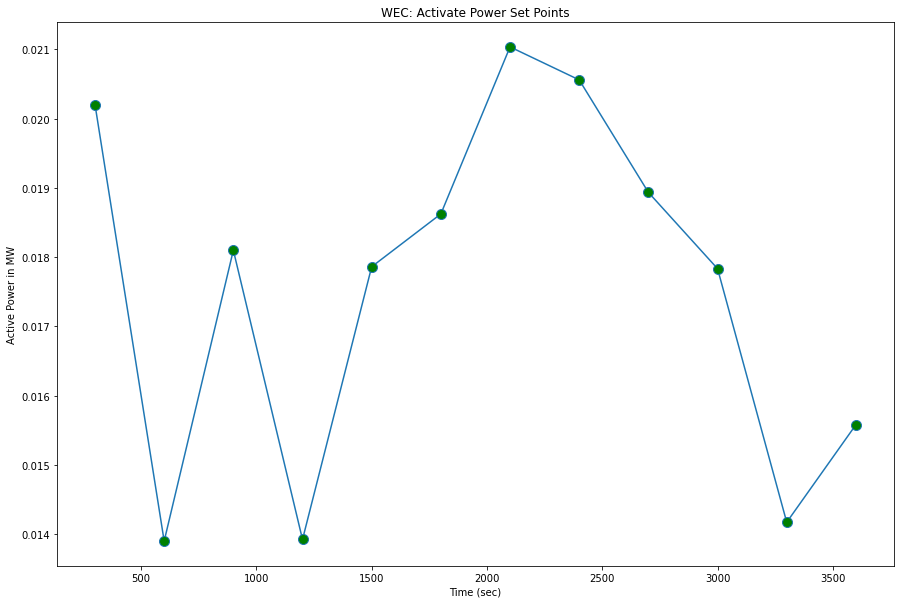

In [11]:
plt.plot(wec_gen_values.Time, wec_gen_values.P, marker="o", markersize=10, markerfacecolor="green")
plt.xlabel("Time (sec)")
plt.ylabel("Active Power in MW")
plt.title("WEC: Activate Power Set Points")

In [34]:
time = [] 
history_swing = []
history_injection = []
history_df = []
wec_bus = 3
for i in range(len(wec_gen_values)):
    print("Time: {}".format(wec_gen_values.iloc[i].Time))
    print("P setpoint: {}".format(wec_gen_values.iloc[i].P))
    pf.dc_injection(wec_bus, wec_gen_values.iloc[i].P)
    history_swing.append(pf.dataframe.P[0])
    history_injection.append(pf.dataframe.P[wec_bus - 1])
    time.append(wec_gen_values.iloc[i].Time)
    history.append(pf.dataframe)
    print("========================")

Time: 300.0
P setpoint: 0.020203849487166015

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.155785E-01    0.202038E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      3     )    0.0000(      5     )
                                                             0.00000(      5     )   0.00001(      3     )
   1         0.0000(      3     )    0.0000(      5     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      4     )    0.0000(      7     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 3 [BUS 3             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 

In [32]:
history[2] == history[3]

,Bus,BASE,PU,ANGLED,Type,P,Q
0,True,True,True,True,True,False,False
1,True,True,True,False,True,False,False
2,True,True,True,False,True,False,False
3,True,True,True,False,True,False,False
4,True,True,False,False,True,False,False
5,True,True,True,False,True,False,False
6,True,True,False,False,True,False,False
7,True,True,True,False,True,False,False
8,True,True,True,False,True,False,False
9,True,True,True,False,True,False,False


In [21]:
wec_gen_values

,Time,ibus,P
0,300.0,1.0,0.020204
1,600.0,1.0,0.013897
2,900.0,1.0,0.018099
3,1200.0,1.0,0.013920
4,1500.0,1.0,0.017861
5,1800.0,1.0,0.018624
6,2100.0,1.0,0.021036
7,2400.0,1.0,0.020560
8,2700.0,1.0,0.018935
9,3000.0,1.0,0.017833


In [19]:
wec_gen_values.Time[len(wec_gen_values)-1]

3600.0

Text(0.5, 0.98, 'WEC Setpoints')

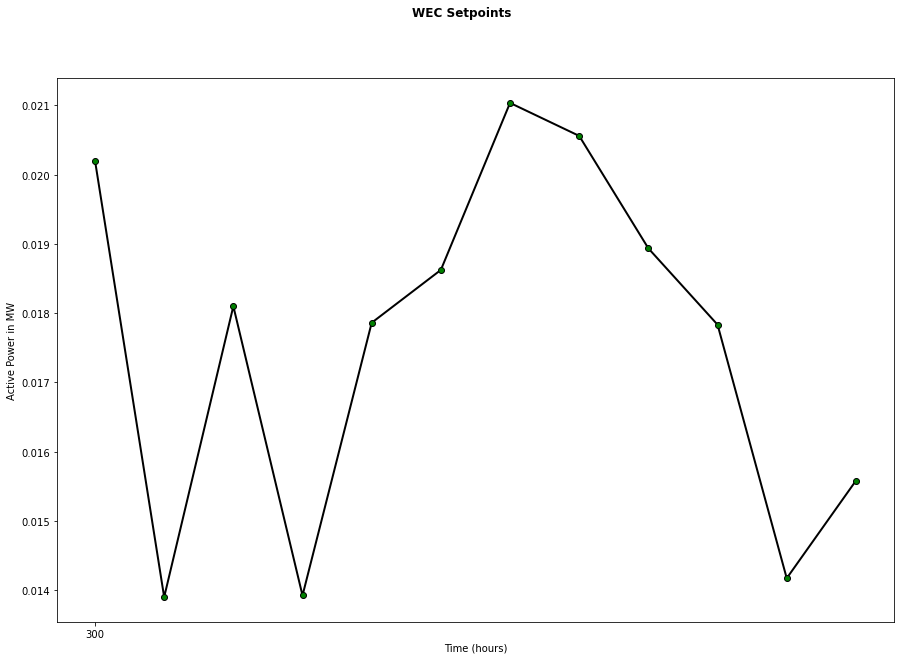

In [22]:
fig, ax = plt.subplots()
ax.plot(time,  wec_gen_values.P, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle('WEC Setpoints', fontweight ="bold")

Text(0.5, 0.98, 'Swing Bus')

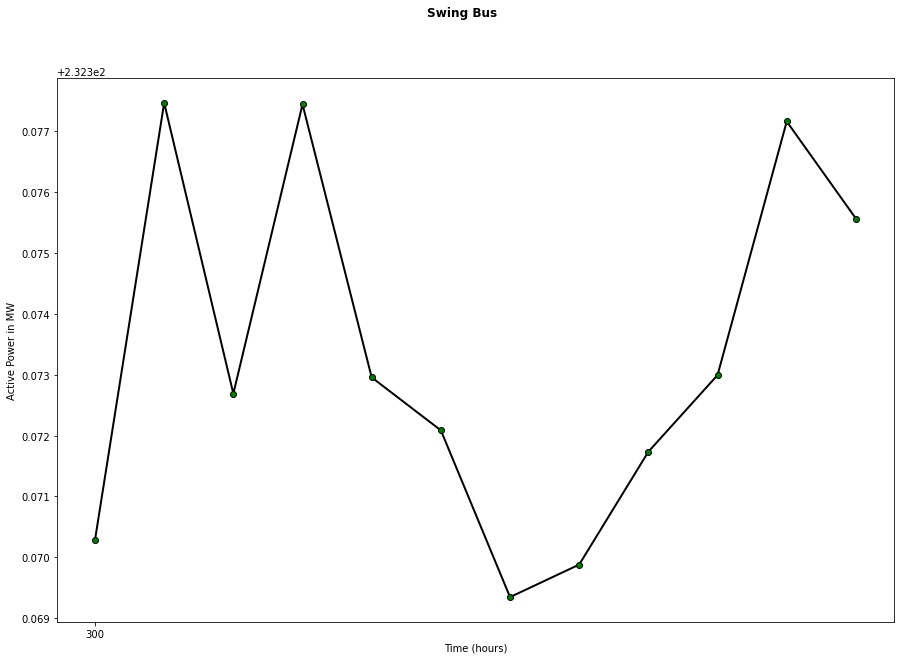

In [36]:
fig, ax = plt.subplots()
ax.plot(time,  history_swing, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle("Swing Bus", fontweight ="bold")

Text(0.5, 0.98, 'WEC Bus')

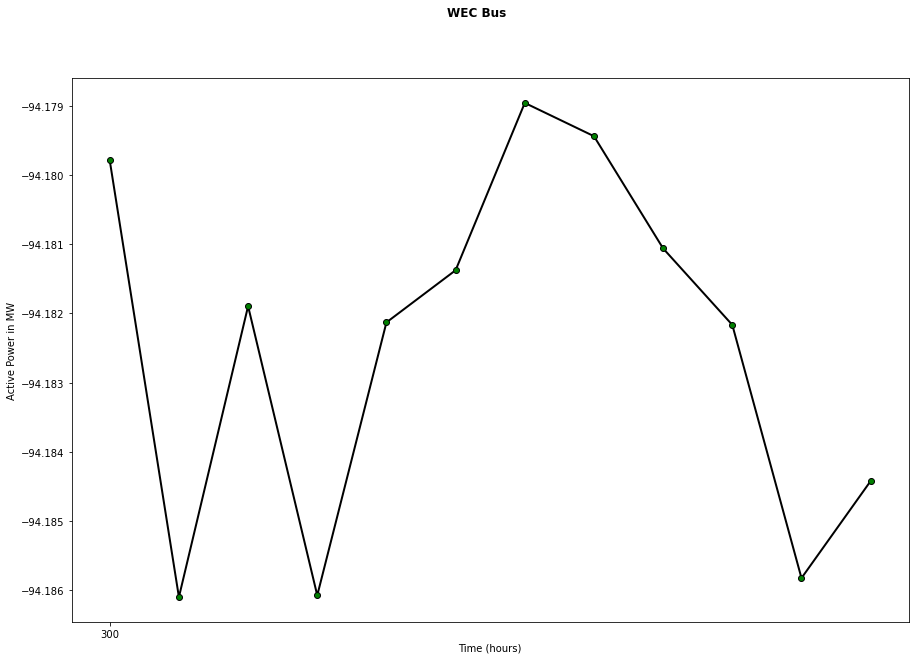

In [38]:
fig, ax = plt.subplots()
ax.plot(time,  history_injection, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle("WEC Bus", fontweight ="bold")